

# Project: TMDB Movie Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

What can we say about the success of a movie before it is released? Are there certain companies that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry.
 
In this project, I have performed an exploratory analysis on data of 10,000 movies provided by TMDB, The Movie Database and tried to find if there are specific parameters associated with movies which were Box Office hit as compared to flop ones.

In [32]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### Step 1: Loading the Data Set

In [33]:
# Load your data and checking the total number of rows and columns in dataset.

df = pd.read_csv('tmdb-movies.csv')
df.shape

(10866, 21)

#### In our dataset , we have 21 columns and 10866 data enteries, where each record corresponds to single movie and their characteristics like budget, revenue , cast , title , director ,popularity rating etc.

In [34]:
#printing the first 5 rows of dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Step 2 : Inspecting the Data Types

In [37]:
#inspecting the data types of each each of the column in data set
df.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Column in our dataset have total 3 types of datatypes -
1.**Integers**

2.**floats**

3.**Strings(Objects)**

## Data Cleaning

### Step 1: Dropping Extranious Columns
We can drop the columns which will not be using in our analysis.

In [38]:
#Dropping unnecessary columns
df.drop(['original_title','homepage','tagline','keywords','overview','production_companies','revenue_adj','budget_adj','release_date'],axis = 1, inplace = True)


In [39]:
#verify if extra columnhas been dropped from the data set
df.shape

(10866, 12)

#### After removing extra columns, we are left with 11 columns

### Step 2: Checking for Duplicate rows in data set
Duplicate enteries in data set can impact the results significantly.

In [40]:
#printing the total number of duplicate rows in our data set
sum(df.duplicated())

1

It indicates that there are only **one** duplicate row in our complete dataset

In [41]:
#Dropping that duplicated rows from the dataset
df.drop_duplicates(inplace= True)

In [42]:
#verifying if duplicate row has been removed
sum(df.duplicated())

0

There are no duplicate enteries left in our dataset.

### Step 3.1: Inspecting the Missing values in data set
Missing values in dataset can affect the analysis process considerably.

In [43]:
#checking the number of missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id              10865 non-null int64
imdb_id         10855 non-null object
popularity      10865 non-null float64
budget          10865 non-null int64
revenue         10865 non-null int64
cast            10789 non-null object
director        10821 non-null object
runtime         10865 non-null int64
genres          10842 non-null object
vote_count      10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


### Step 3.2: Checking for total number of rows which have at least one NULL/Missing value



In [44]:
#computing total no. of rows in dataset which have missing values
df.isnull().any(axis = 1).sum()

139

There are **139** rows in our data set which have missing values.

### Step 3.3: Dropping the rows having NULL values in data set

In [45]:
#Dropping rows having missing values
df.dropna(inplace=True)

In [46]:
#verifying the removal of missing values
df.isnull().any(axis = 1).sum()

0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10726 entries, 0 to 10865
Data columns (total 12 columns):
id              10726 non-null int64
imdb_id         10726 non-null object
popularity      10726 non-null float64
budget          10726 non-null int64
revenue         10726 non-null int64
cast            10726 non-null object
director        10726 non-null object
runtime         10726 non-null int64
genres          10726 non-null object
vote_count      10726 non-null int64
vote_average    10726 non-null float64
release_year    10726 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Question : How the success of the movie depends on the cast?

**Answer**: Based on below analysis, it can be concluded that movie of some actors such as  **CHRIS PRATT** , **WILLIAM MOSELEY** will perform better in box office as compared to movie of **BEN BRUTT**.

In [48]:
df['lead'] = df['cast'].apply(lambda x: x.split("|")[0])
df['lead']

0                     Chris Pratt
1                       Tom Hardy
2                Shailene Woodley
3                   Harrison Ford
4                      Vin Diesel
5               Leonardo DiCaprio
6           Arnold Schwarzenegger
7                      Matt Damon
8                  Sandra Bullock
9                     Amy Poehler
10                   Daniel Craig
11                     Mila Kunis
12               Domhnall Gleeson
13                   Adam Sandler
14              Robert Downey Jr.
15              Samuel L. Jackson
16                    Liam Neeson
17                      Paul Rudd
18                     Lily James
19              Jennifer Lawrence
20                Britt Robertson
21                Jake Gyllenhaal
22                 Dwayne Johnson
23                 Dakota Johnson
24                 Christian Bale
25                     Tom Cruise
26                  Mark Wahlberg
27                  Taron Egerton
28                   Mark Ruffalo
29            

In [49]:
#calculating the mean revenue generated by movie of each of the lead actor/actress

#finding top 10 actors in terms of revenue generation
df_top10_lead_revenue = df.groupby('lead',as_index=False)['revenue'].mean().sort_values(by = 'revenue', ascending = False).head(10)

#finding lowest 10 actors in terms of revenue generation
df_bottom10_lead_revenue = df.groupby('lead',as_index=False)['revenue'].mean().sort_values(by = 'revenue', ascending = False).tail(10)

print(df_top10_lead_revenue)
print(df_bottom10_lead_revenue)




                  lead       revenue
742        Chris Pratt  1.143421e+09
4214   William Moseley  7.488070e+08
3662       Scott Adsit  6.521054e+08
3881      Suraj Sharma  6.090166e+08
895     Dakota Johnson  5.696515e+08
933   Daniel Radcliffe  5.592007e+08
2537        Lily James  5.423514e+08
2312   Kelly Macdonald  5.389832e+08
907   Dan Castellaneta  5.270689e+08
385          Ben Burtt  5.213119e+08
                   lead  revenue
1776     Janette Armand      0.0
1777      Jang Dong-gun      0.0
1778       Janis Joplin      0.0
1780      Jared Kusnitz      0.0
1782  Jascha Washington      0.0
1783         Jasen Wade      0.0
1784     Jasmine Trinca      0.0
1785       Jason AcuÃ±a      0.0
1786    Jason Alexander      0.0
4270  Ã€lex BrendemÃ¼hl      0.0


In [51]:
#converting revenue format from scientifc notation to nearest Integers

df_top10_lead_revenue['revenue'] = df_top10_lead_revenue['revenue'].apply(lambda x : int(x))
df_bottom10_lead_revenue['revenue'] = df_bottom10_lead_revenue['revenue'].apply(lambda x : int(x))
print(df_top10_lead_revenue)


print(df_bottom10_lead_revenue)

                  lead     revenue
742        Chris Pratt  1143420604
4214   William Moseley   748806957
3662       Scott Adsit   652105443
3881      Suraj Sharma   609016565
895     Dakota Johnson   569651467
933   Daniel Radcliffe   559200675
2537        Lily James   542351353
2312   Kelly Macdonald   538983207
907   Dan Castellaneta   527068851
385          Ben Burtt   521311860
                   lead  revenue
1776     Janette Armand        0
1777      Jang Dong-gun        0
1778       Janis Joplin        0
1780      Jared Kusnitz        0
1782  Jascha Washington        0
1783         Jasen Wade        0
1784     Jasmine Trinca        0
1785       Jason AcuÃ±a        0
1786    Jason Alexander        0
4270  Ã€lex BrendemÃ¼hl        0


Text(0.5,1,'Top 10 actors in terms of revenue generation')

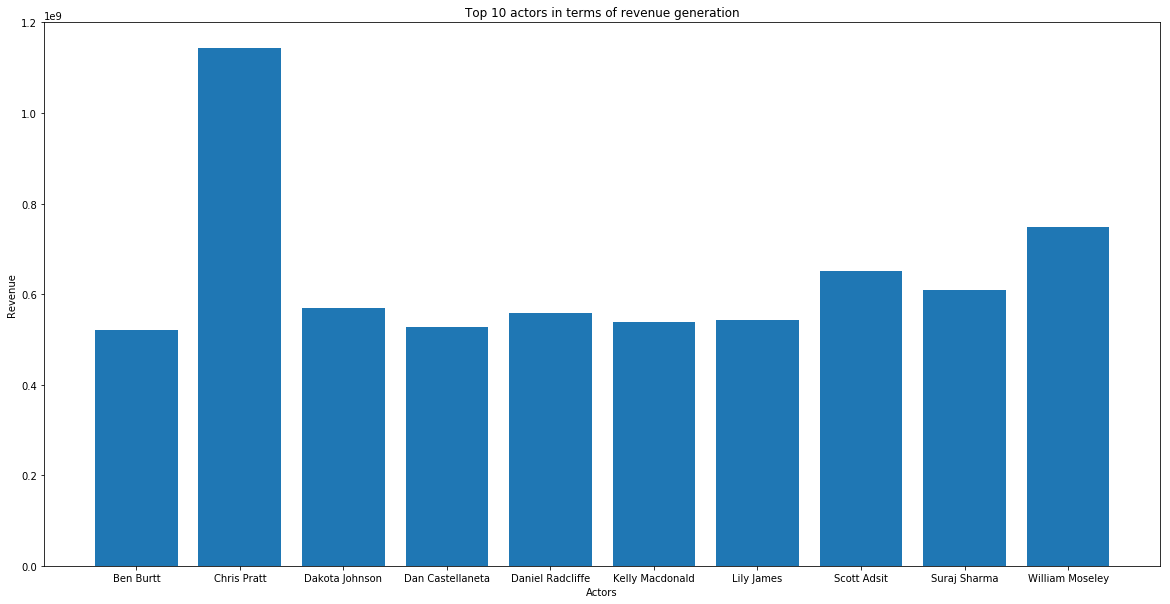

In [52]:
#plotting the top 10 actors in terms of mean revenue generated by their movies
plt.subplots(figsize = (20,10))
plt.bar(df_top10_lead_revenue['lead'], df_top10_lead_revenue['revenue']);
plt.xlabel('Actors')
plt.ylabel('Revenue')
plt.title('Top 10 actors in terms of revenue generation')

It can be clearly seen that movie of chris pratt is likely to generate more revenue as compared to any other actor as lead.

### Question : Which genres are most popular from year to year?

**Answer** : **Western** genre continues to be the most popular among the audience for approximately entire period.
Apart from that, **Thriller, Music, Comedy, Crime** movies were most liked by the people in **1960**.
After that **War, Action, History, Adventure** genres were more favoured by audience. This trend continued till 2010.
Following this, people once again started accepting **Thriller, Horror ,Drama,Adventure** movies.


In [53]:
#Computing Mean popularity of movies based on their year of release and type of Genres.
df_genre_popularity_byYear = df.groupby(['release_year','genres'],as_index=False)['popularity'].mean()
print(df_genre_popularity_byYear)



      release_year                                             genres  \
0             1960             Action|Adventure|Drama|History|Western   
1             1960                           Action|Adventure|Western   
2             1960                   Action|Drama|Foreign|History|War   
3             1960                               Action|Drama|History   
4             1960                           Action|Drama|History|War   
5             1960                       Action|Drama|Romance|Western   
6             1960                               Action|Drama|Western   
7             1960                                     Action|Western   
8             1960                                   Adventure|Family   
9             1960                  Adventure|Fantasy|Science Fiction   
10            1960                                             Comedy   
11            1960                               Comedy|Drama|Romance   
12            1960                                 

In [54]:
#Finding the genre which has highest popularity each year
df_genre_max_popularity_byYear = df_genre_popularity_byYear.groupby('release_year')['genres','popularity'].max()
print(df_genre_max_popularity_byYear)

                                                       genres  popularity
release_year                                                             
1960                              Thriller|Music|Comedy|Crime    2.610362
1961                                 Western|Action|Adventure    2.631987
1962                           Western|Action|Adventure|Drama    3.170651
1963                                     Romance|Comedy|Drama    2.508235
1964                                           Western|Action    3.153791
1965                                        War|Drama|Romance    1.910465
1966                                                  Western    1.227582
1967                                                  Western    2.550704
1968                                                  Western    3.309196
1969          Thriller|Fantasy|Action|Science Fiction|Western    1.778746
1970                                                  Western    1.936962
1971                                  

Text(0.5,1,'Most Popular Genres each year')

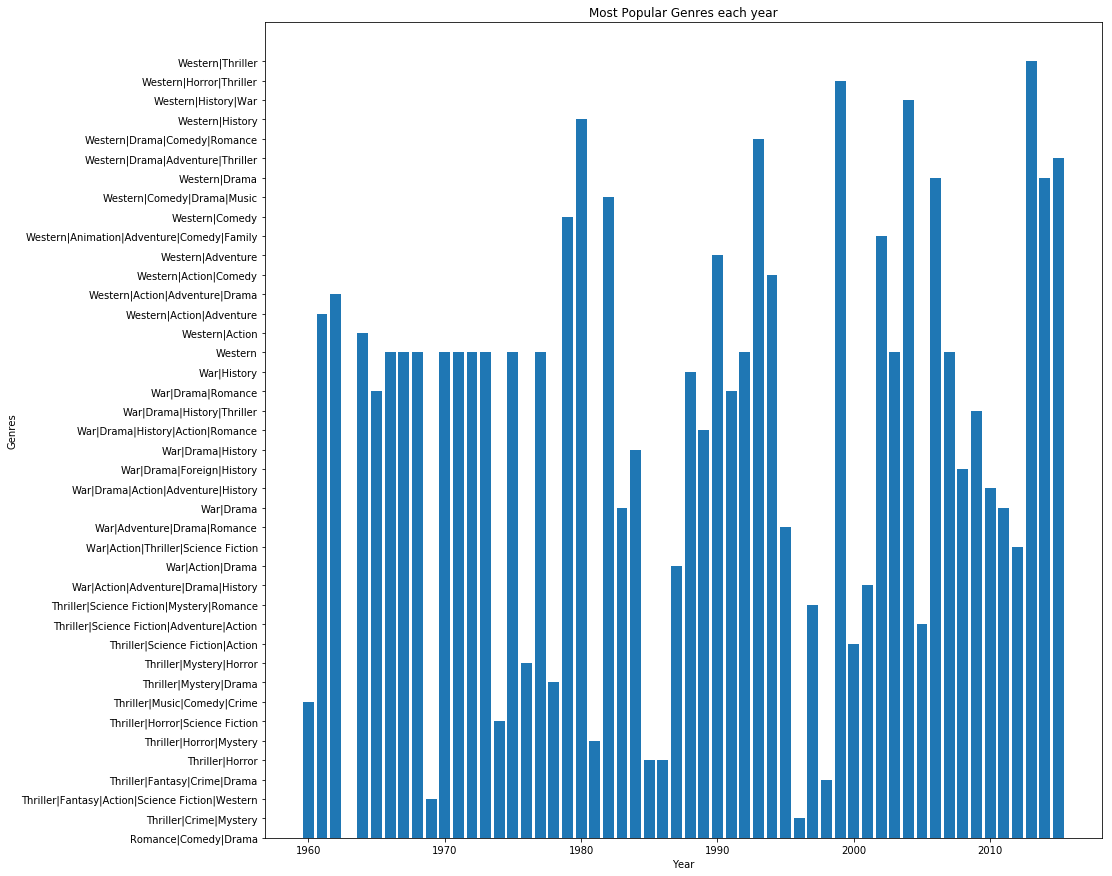

In [55]:
#Visualizing the findings
plt.subplots(figsize = (15,15))
plt.bar(df_genre_max_popularity_byYear.index,df_genre_max_popularity_byYear['genres']);
plt.xlabel("Year")
plt.ylabel("Genres")
plt.title("Most Popular Genres each year")

Above Bar graph shows that different genres were popular among audience over the time.

### Question 2 : How is Revenue associated with Popularity and the budget of movie?

**Answer** : As per analysis, movies were **more** popular among audience tend to have **high** revenues.
Also, Movies with **higher** budget tend generate **more** revenues. High budget movies like Pirates of Caribbean: On Stranger and Avengers:Age of Ultron are among top 5 movies in terms of revenue generation.

In [56]:
#Calculating Popularity in Standard units
std_popularity = (df['popularity']- df['popularity'].mean()) / df['popularity'].std(ddof = 0)

In [57]:
#calculating revenue in Standard units
std_revenue = (df['revenue']- df['revenue'].mean()) / df['revenue'].std(ddof = 0)

In [58]:
#Calculating Budget in Standard units
std_budget = (df['budget']- df['budget'].mean()) / df['budget'].std(ddof = 0)

In [59]:
#Computing Pearson's R/Correlation between Popularity and revenue
PearsonR_revenue_popularity = (std_revenue*std_popularity).mean()
print(PearsonR_revenue_popularity)

0.662833848137


**Positive** value of 0.663 Pearson's R indicates that there is positive relationship between Popularity of the movie and revenue generated by movie. 

In [60]:
#Computing Pearson's R/Correlation between Budget and revenue
PearsonR_revenue_budget = (std_revenue*std_budget).mean()
print(PearsonR_revenue_budget)

0.73447021292


**Positive** value of 0.734 Pearson's R indicates that there is positive relationship between Budget of the movie and revenue generated by movie. 

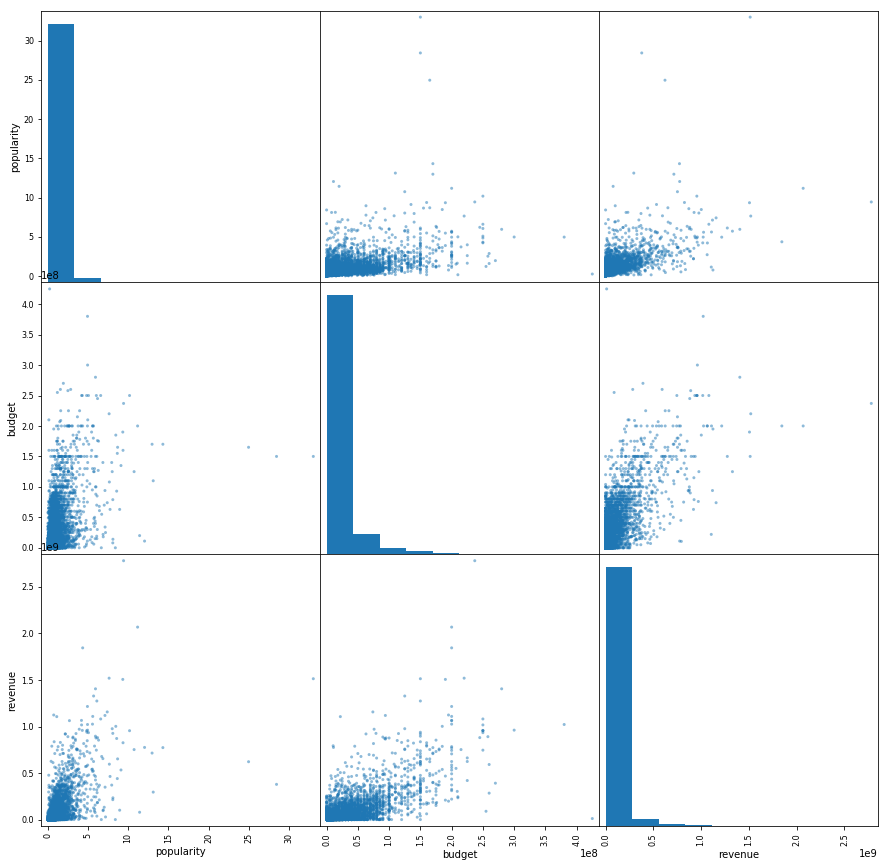

In [61]:
#plotting scatter plot to validate the poritive relationship between popularity and budget of movie with Revenue generation
pd.plotting.scatter_matrix(df.loc[:,'popularity':'revenue'], figsize=(15,15));

Above Scatter plot clearly shows the positive relationship between popularity and budget of the movie with revenue. It means Movies having high popularity and high making cost tend to do more business in Box office.


### Question 4 : How is growth of movie industry varied over the time period?

**Answer**: Anlaysis shows significant increase in number of movies released every year. It started with **32** no. of movies released in year 1960, increased progressively over the time to reach **694** mark by 2014.
This signifies that hollywood industry was always good investment which results in attracting more producers every year to invest their money resulting in more number of movies each year.

In [62]:
#computing total number of movies released each year
df_totalmovies_year = df.groupby('release_year', as_index= False)['imdb_id'].count()
print(df_totalmovies_year)

    release_year  imdb_id
0           1960       32
1           1961       31
2           1962       32
3           1963       34
4           1964       42
5           1965       35
6           1966       46
7           1967       38
8           1968       38
9           1969       30
10          1970       40
11          1971       55
12          1972       40
13          1973       55
14          1974       46
15          1975       44
16          1976       47
17          1977       56
18          1978       65
19          1979       57
20          1980       78
21          1981       82
22          1982       81
23          1983       80
24          1984      104
25          1985      108
26          1986      120
27          1987      124
28          1988      142
29          1989      135
30          1990      132
31          1991      133
32          1992      132
33          1993      177
34          1994      184
35          1995      174
36          1996      203
37          

Text(0.5,1,'No. of movies released each year')

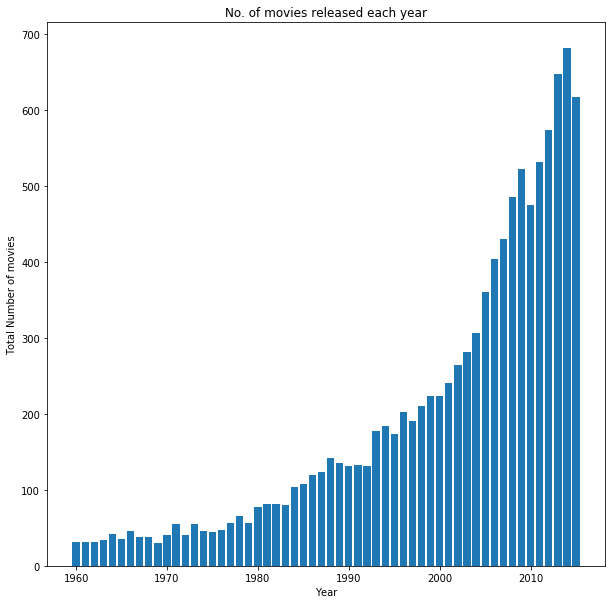

In [63]:
#plotting the bar graph
plt.subplots(figsize = (10,10))
plt.bar(df_totalmovies_year['release_year'] , df_totalmovies_year['imdb_id']);
#labelling the bar graph
plt.xlabel("Year")
plt.ylabel("Total Number of movies")
plt.title("No. of movies released each year")


<a id='conclusions'></a>
## Conclusions

Below are the findings from the TMDB movie data set:-

1. Movie of some actors such as CHRIS PRATT , WILLIAM MOSELEY will likely to perform better in box office as compared to movie of BEN BRUTT.
2. It is clearly visible that popularity of movie genres among the audience changed over the time period.
3. Another observation is that movies having **high popularity rating** and high budget contribute **more to revenue generation** .
4. Hollywood movie industry grew progressively over the period of time results in significant increase in no. of movies released every decade.

**LIMITATIONS**
1. There is no exchanges rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
2. We have not considered the type of vote positive or negative or any other value.
3. Dropping missing or Null values from variables might skew our analysis and could unintentional bias the results/conclusions.
4. There is no statistical test performed on the results.




In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])